The general goal of a topic model is to produce interpretable document representations which can be used to discover the topics or structure in a collection of unlabelled documents. An example of such an interpretable document representation is: document X is 20% topic a, 40% topic b and 40% topic c.

https://www.datacamp.com/tutorial/what-is-topic-modeling

https://python-textbook.pythonhumanities.com/04_topic_modeling/04_01_02_topic_modeling_concepts.html

https://youtube.com/playlist?list=PL2VXyKi-KpYttggRATQVmgFcQst3z6OlX&si=edFCyp_XWZf9-QfH

In [ ]:
# Check if gensim is installed, install if not
try:
    import gensim
except ImportError:
    !pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
try:
    import pyLDAvis
except ImportError:
    !pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.8 MB/s eta 0:00:00


In [ ]:
import numpy
numpy.__version__

'2.0.2'

In [ ]:
import scipy
scipy.__version__

'1.13.1'

In [ ]:
import gensim
gensim.__version__

'4.3.3'

### Why Topic Modelling?###

Topic modeling is a frequently used approach to discover hidden semantic patterns portrayed by a **text corpus** and automatically **identify topics** and **draw conclusions** that exist inside it.

Namely, it’s a type of statistical modeling that leverages **unsupervised machine learning** to analyze and **identify clusters or groups** of similar words within a body of text.

Eg: A topic modeling algorithm may be deployed to determine whether the contents of a document imply it’s an invoice, complaint, or contract.

---
Topic Modelling can be done using **rules based** or **machine learnung based**
---
### Rules-Based Methods
A simple approach to the identification of topics in a collection of documents is what we would call a rules-based approach. Here, we could argue that documents in which certain words appear indicate a specific topic. This manual approach may yield good results. For example, if I had a 100,000 documents and I knew that some dealt with medical details, I could look for a handful of terms, such as doctor, medicine, hospital, etc. to extract those documents as dealing with a topic of medical.

The **key problem** with this approach is **scale**. We cannot practically construct lists like this for all possible topics, especially if we do not know the topics found within a corpus. Further, constructing lists like this requires detailed knowledge about a subject. For these reasons, a rules-based approach to classifying documents is not practical for large corpora.

### Machine Learning-Based Methods
Another option to identify topics in a text is via a machine learning-based approach. In this method, we do not give a computer system a set of rules, rather we let the computer generate its own rules to identify topics in a corpus.

This is done in two different ways:
- supervised
- unsupervised learning.

In supervised learning, we know the key subjects in a corpus. We give a computer system a set of documents with their corresponding label to teach it to identify the characteristics that make that particular topic or class unique. This is mostly used for **text classification**.

In unsupervised learning, we do not know the topics of our documents and, instead, we want let the system identify those topics and cluster (or group together) the ones of a high degree of similarity together. We then examine the words that occur the most frequently in each cluster to get a sense of the topics at hand.

The classic example for machine learning topic modeling is **LDA, or Latent Dirichlet Allocation**

---




## 1. Topics vs. Clusters

Topics are labels assigned to textual data that detail the subjects contained within a given text.

Texts that share common terms are clustered together by similarity. A cluster is nothing more than a collection of similar pieces of data. When we are working with texts, a cluster is a collection of texts that have similar overlapping themes.

- **Cluster**  
  - **Hard assignment**: each document belongs to exactly one group.  
  - Representation: centroids or prototypes.  
  - Example: K‑means partitions documents into disjoint sets.

- **Topic**  
  - **Soft mixture**: each document is a weighted combination of topics.  
  - Representation: topics are distributions over words, documents are distributions over topics.  
  - A document might be, say, 70 % Topic A and 30 % Topic B.

| Aspect           | Clustering               | Topic Modeling                          |
|------------------|--------------------------|-----------------------------------------|
| Assignment       | Hard (one cluster/doc)   | Soft (mixture of topics/doc)            |
| Representation   | Centroid/prototype       | Probability distribution over words     |
| Use‑case         | Partitioning             | Thematic exploration, mixed membership  |

---

## Latent Semantic Analysis (LSA)

LSA uses Singular Value Decomposition (SVD) to reduce the dimensionality of a document-term matrix, highlighting the latent semantic relationships between words and documents.

1. **Construct** the document–term matrix  
   \begin{equation}
     X(DTM) \in \mathbb{R}^{D \times V},\quad X_{d,w} = \text{count or TF‑IDF}
   \end{equation}
   Once we have our document-term matrix X, which is very sparse, very noisy, and very redundant across its many dimensions. As a result, to find the few latent topics that capture the relationships among the words and documents, we want to perform dimensionality reduction on X. This dimensionality reduction can be performed using truncated SVD.

2. **Truncated SVD** (rank \(r\)):  

    In essence,  
    SVD, or singular value decomposition, is a technique in linear algebra that factorizes any matrix M into the product of 3 separate matrices: $M=U \times \Sigma \times V$, where (U) is a left singular vector matrix, $\Sigma$ is a diagonal matrix containing singular values of M and (V) is a right singular vector matrix. Singular values are real, non-negative numbers derived from a matrix through a process called Singular Value Decomposition (SVD). Specifically, they are the square roots of the eigenvalues of the matrix $M^TM$ (or $MM^T$ for real matrices), where $M^T$ is the transpose of M. They represent the "magnitude" of the transformation associated with the matrix. These values, along with corresponding singular vectors, allow for a matrix to be decomposed into a product of three matrices, providing insights into its properties and structure.
    
    Critically, truncated SVD reduces dimensionality by selecting only the t largest singular values, and only keeping the first t columns of U and V. In this case, t is a hyperparameter we can select and adjust to reflect the number of topics we want to find

    \begin{equation}
     X = U\,\Sigma\,V^\top,
     \quad
     U\in\mathbb{R}^{D\times t},\;
     \Sigma\in\mathbb{R}^{t\times t},\;
     V\in\mathbb{R}^{V\times t}.
    \end{equation}

   Intuitively, think of this as only keeping the t most significant dimensions in our transformed space.
   In this case, $U \in\mathbb{R}^{(D \times t)}$ emerges as our document-topic matrix, and $V \in\mathbb{R}^{(V \times t)}$ becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

    With these document vectors and term vectors, we can now easily apply measures such as cosine similarity to evaluate:

    - the similarity of different documents
    - the similarity of different words
    - the similarity of terms (or “queries”) and documents (which becomes useful in information retrieval, when we want to retrieve passages most relevant to our search query).

3. **Interpretation**  
   - Topics = the $r$ singular vectors (columns of $V$).  
   - Document embeddings = rows of $U\Sigma$.  
   - Word embeddings = rows of $V\Sigma$.  

**Key**: purely algebraic, can yield negative weights, fast closed‑form solution.

---

### Eigen Vectors and EIgen Values

In linear algebra, an eigenvector of a matrix(matrix=group of vectors) is a non-zero vector that, when a linear transformation is applied to it, is scaled by a constant (the eigenvalue). This means the eigenvector's direction remains unchanged, and the eigenvalue indicates the amount by which the vector is stretched or shrunk.

**Eigenvectors:**

These are special vectors associated with a matrix that don't change direction when the matrix is applied to them. They are also called characteristic vectors.

**Eigenvalues:**
These are the scalar values that represent how much the eigenvector is stretched or shrunk after the linear transformation.

**Linear Transformation:**
In the context of eigenvalues and eigenvectors, a linear transformation is represented by a matrix, and it's a function that maps vectors to other vectors, often involving scaling and rotation.

**The Equation:**
The relationship between an eigenvector (v), its corresponding eigenvalue (λ), and the matrix (A) is expressed as: Av = λv. This equation states that when matrix A is applied to the eigenvector v, the result is the same as scaling v by the eigenvalue λ

## Latent Dirichlet Allocation (LDA)

Similar to LSA, LDA is also an unsupervised technique that doesn't require labeled data. But, LDA uses a **probabilistic generative model** to infer the topics and their word distributions in a corpus. LDA assumes each document is a mixture of topics. It works by modeling documents as a mixture of underlying topics and topics as a distribution of words. It iteratively refines the topic-word and document-topic distributions until a stable model is reached, essentially figuring out which topics are most relevant to each document and which words are most indicative of each topic

In essence, both techniques aim to uncover hidden topics in text data, but **LSA does so through a mathematical reduction of the data's complexity**, while **LDA uses a statistical model to infer the topics based on probabilities**.

A **probabilistic** generative model:

- For each document $d$:  
  1. Draw topic proportions  
    \begin{equation}
     \theta_d \sim \mathrm{Dirichlet}(\alpha)
    \end{equation}
  2. For each word position \(n\):  
     - Draw topic  
       \begin{equation}
        z_{d,n}\sim\mathrm{Categorical}(\theta_d)
        \end{equation}
     - Draw word  
       \begin{equation}
        w_{d,n}\sim\mathrm{Categorical}(\varphi_{z_{d,n}})
        \end{equation}

- **Inference** (Gibbs sampling or variational Bayes) recovers:  
  - $\Theta = [\theta_d]\in\mathbb{R}^{D\times K} $ (doc × topic).  
  - $\Phi = [\varphi_k]\in\mathbb{R}^{K\times V} $ (topic × word).

**Key**: topics are probability distributions, documents mix topics under a Dirichlet prior.

---
Working of LDA:
---

- Create BoW typed corpus
- Initialization:
    - Randomly assign each word in each document to a topic.
        - Example: the word "election" might randomly belong to topic 2.
- Iterative Updates (Gibbs Sampling / Variational Inference):
    - For each word w in each document d:
        - Temporarily remove the current topic assignment of w.
        - Recalculate two probabilities:
                P(topic k |document d)
                P(word w | topic k)
        - Multiply those two:
                P(topic k | d,w) ∝ P(topic k | d) × P(w | topic k)
        -  Based on this combined probability, reassign the word to a topic.
- Repeat Steps (2) for multiple passes (iterations) until things stabilize (convergence)
---

Note:

Both LSA (Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation) are unsupervised machine learning techniques used for topic modeling, but they differ in their approach. LSA is a mathematical method based on dimensionality reduction using SVD, while LDA is a probabilistic model that learns the underlying topics and their distributions in a corpus.

But if we know the underlying topics beforehand based on domain knowledge, we can treat these known topics as labels and turn the topic modeling to supervised multi-class text classification

---

Intuition of LDA(Latent Dirichlet Allocation):

LDA assumes:

- Each document is a **mixture of topics** (like a recipe).
- Each topic is a **distribution over words** (like a flavor profile).

You give LDA a bunch of documents, and it tries to **reverse-engineer**:
- What the topics are.
- How much of each topic appears in each document.
- Which words are strongly associated with each topic.

---

### Analogy: Pizza and Toppings

Think of documents as pizzas and topics as toppings.

- Each pizza (document) has some mixture of toppings (topics).
- Each topping has certain ingredients (words).

LDA looks at all the pizzas and tries to figure out:
- What are the standard toppings (topics)?
- Which toppings are on which pizza?

---

### What it gives you:

1. **Topic–Word Distribution** (e.g., Topic 2 is 40% "war", 30% "army", 30% "soldier")
2. **Document–Topic Distribution** (e.g., Document 7 is 70% Topic 2, 30% Topic 5)

---

### Key Concepts:

- **Dirichlet distributions**: Priors that enforce sparsity (i.e., documents prefer a few topics; topics prefer a few words).
- **Bag-of-words assumption**: Ignores word order, only cares about word counts.

---

### Summary:

> **LDA = Soft clustering of words into topics, and soft clustering of documents into those topics.**

Unlike K-means clustering which does hard assigment of docs to clusters.

You don’t tell it what topics to use — it **finds them** based on patterns in word co-occurrence.

---

Note: This is different from Linear Discirminant Analysis which is dimensionality reduction technique. Linear Discirminant Analysis is a supervised technique that utilizes class labels to find the feature subspace that maximizes class separability. Principal Component Analysis is an unsupervised technique(linear dimensionality reduction) and does not use class labels during dimensionality reduction. PCA is a widely used technique that transforms data into a lower-dimensional space by identifying the principal components, which capture the most variance in the data. t-Distributed Stochastic Neighbor Embedding t-SNE is a non-linear dimensionality reduction technique often used for data visualization, allowing for the exploration of relationships between data points in a lower-dimensional space

---

## Non‑negative Matrix Factorization (NMF)

An **algebraic** factorization of \(X\):

\begin{equation}
  X \;\approx\; W\,H,
  \quad
  W\in\mathbb{R}_{\ge0}^{D\times K},\;
  H\in\mathbb{R}_{\ge0}^{K\times V}.
\end{equation}

- $W_{d,k}$: strength of topic $k$ in doc $d$.  
- $H_{k,w}$: weight of word $w$ in topic $k$.  
- Solved via multiplicative updates or alternating least squares.

**Key**: non‑negativity yields interpretable “parts‑based” topics without probabilistic priors.

---


## Advanced Extensions

- **Correlated Topic Model (CTM)**  
  - Replaces Dirichlet on $\theta_d$ with a logistic normal, allowing topics to correlate.
- **Hierarchical Dirichlet Process (HDP)**  
  - A nonparametric Bayesian model that **infers** the number of topics $K$ from data.

---

## Workflow

1. **Preprocess** text: tokenize, remove stop‑words, (optionally) stem/lemmatize.  
2. **Build** document–term matrix $X$.  
3. **Choose** model & hyperparameters  
   - LSA: rank $r$.  
   - LDA/NMF: number of topics $K$  
   - HDP: no fixed $K$.  
4. **Fit** model → obtain document $\times$ topic and topic $\times$ word factors.  
5. **Inspect** results:  
   - Top‑$N$ words per topic $(\max_w \varphi_{k,w}$ or highest $H_{k,w}$).  
   - Topic proportions per document ($\theta_d$ or $W_{d,k}$).  

### Summary

- **LSA** uses **SVD** to get latent dimensions (topics) but allows negative weights and lacks a probabilistic foundation.  
- **LDA** is a fully **probabilistic** model that treats documents as mixtures of topics under Dirichlet priors.  
- **NMF** is an **algebraic**, non‑negative factorization yielding interpretable soft topics.  
- **CTM** and **HDP** extend LDA for correlated topics and automatically determined topic counts, respectively.

Each method offers a different balance of **speed**, **interpretability**, and **modeling assumptions**, but all aim to uncover the hidden thematic structure in text through **soft, overlapping groupings** of words and documents.

| Feature            | LSA (SVD)            | LDA                        | NMF                        |
|--------------------|----------------------|----------------------------|----------------------------|
| Core method        | SVD (eigenvectors)   | Generative Bayesian model  | Constrained matrix factor. |
| Topic vectors      | Real (±)             | Probabilities (≥0, sum 1)  | Weights (≥0)               |
| Document mixture   | Real weights         | Dirichlet mixtures         | Real weights               |
| Interpretability   | Medium               | High                       | High                       |
| Complexity         | One SVD              | Iterative inference        | Iterative updates          |

---

### KMeans with tfidf : Unsupervised Topic Modelling
- TF-IDF Vectorized Representation
- K-Means Clustering

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/NLP/data/trc_dn.json .
!cp /content/drive/MyDrive/Colab\ Notebooks/NLP/data/months.json .

In [ ]:
from textwrap import indent
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import numpy as np

import json
import re
import string

def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(file_path, data):
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, file_path, indent=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TF-IDF
def preprocess_text(stop_words, text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    text = text.split()
    clean_text = []
    for w in text:
        if w not in stop_words and not w.isdigit():
            clean_text.append(w)
    clean_text = " ".join(clean_text)
    while "  " in clean_text:
        clean_text = clean_text.replace("  ", " ")
    return clean_text

def clean_data(docs):
    final_docs = []
    stop_words = stopwords.words("english")
    months = load_json("./months.json")
    stop_words = stop_words + months
    for doc in docs:
        cleaned_doc = preprocess_text(stop_words, doc)
        final_docs.append(cleaned_doc)
    return final_docs

# Prepare data
input_file_path = "./trc_dn.json"
docs = load_json(input_file_path)["descriptions"]
cleaned_docs = clean_data(docs)

# Tf-IDF vectorization
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", max_df=10, min_df=3, max_features=100, ngram_range=(1, 3))
vectors = vectorizer.fit_transform(cleaned_docs)  # (21747, 100)
feature_names = vectorizer.get_feature_names_out()

# Clustering
k=20
model = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=1)
model.fit(vectors)  # (21747,)

KMeans(n_clusters=20, n_init=1)

In [ ]:
clusters = model.cluster_centers_
clusters_sort = clusters.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names_out()

In [ ]:
vectors.shape, type(clusters), clusters.shape, feature_names.shape, clusters_sort.shape

((21747, 100), numpy.ndarray, (20, 100), (100,), (20, 100))

**What KMeans doing here?**

Initializes k=20 random centroids in 100-dimensional space.

Iteratively:
- Assigns each document to the nearest centroid (based on Euclidean distance).
- Updates the centroids as the mean of all documents assigned to that cluster.

**What is the output of model.cluster_centers_?**

Shape: (20, 100) → 20 cluster centroids, each with 100 TF-IDF dimensions.
Each centroid is an average vector of all documents in that cluster.
That's why, the cluster centers have the same features as your original TF-IDF vectors because KMeans never changes the feature space, it just groups and averages.

Note: Each feature index corresponds to a TF-IDF term. We can interpret each cluster center by looking at its top TF-IDF terms — the most representative terms for that cluster.

In [ ]:
topk = 10

for centroid in range(k):
    print(f"Cluster: {centroid}")
    print("\n")
    # Access the topk features per each centroid
    idxs = clusters_sort[centroid, :topk]
    for idx in idxs:
        print(feature_names[idx])
    print("\n")

Cluster: 0


tvl july conflict
steadville
shot alleged
supporters suspected proanc
rates boycott
mr ndlovu
motherwell
supporters supporters
mufc
coerced ifp


Cluster: 1


member disappeared
xaba
tvl july conflict
unita
traffic officers
terms
supporters swanieville near
supporters suspected proanc
supporters supporters
steadville


Cluster: 2


conduct
xaba
tvl july conflict
unita
traffic officers
terms
supporters swanieville near
supporters suspected proanc
supporters supporters
steadville


Cluster: 3


recruited military
recruited military training
ac19990030 ac19990197
ac19990031 ac19990188
ac19990031 ac19990188 ac19990030
tsineng
traffic officers
terms
supporters supporters
tvl july conflict


Cluster: 4


xaba
unita
tvl july conflict
tsineng
traffic officers
terms
supporters swanieville near
supporters suspected proanc
supporters supporters
steadville


Cluster: 5


distributing
xaba
tvl july conflict
unita
traffic officers
terms
supporters swanieville near
supporters suspected p

In [ ]:
topk = 10
with open ("./trc_results.txt", "w", encoding="utf-8") as f:
    for centroid in range(k):
        f.write(f"Cluster: {centroid}")
        f.write("\n")
        # Access the topk features per each centroid
        features = clusters[centroid]
        for feat_idx in clusters_sort[centroid, :10]:
            f.write (' %s' % feature_names[feat_idx],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

(21747, 2) <class 'numpy.ndarray'>


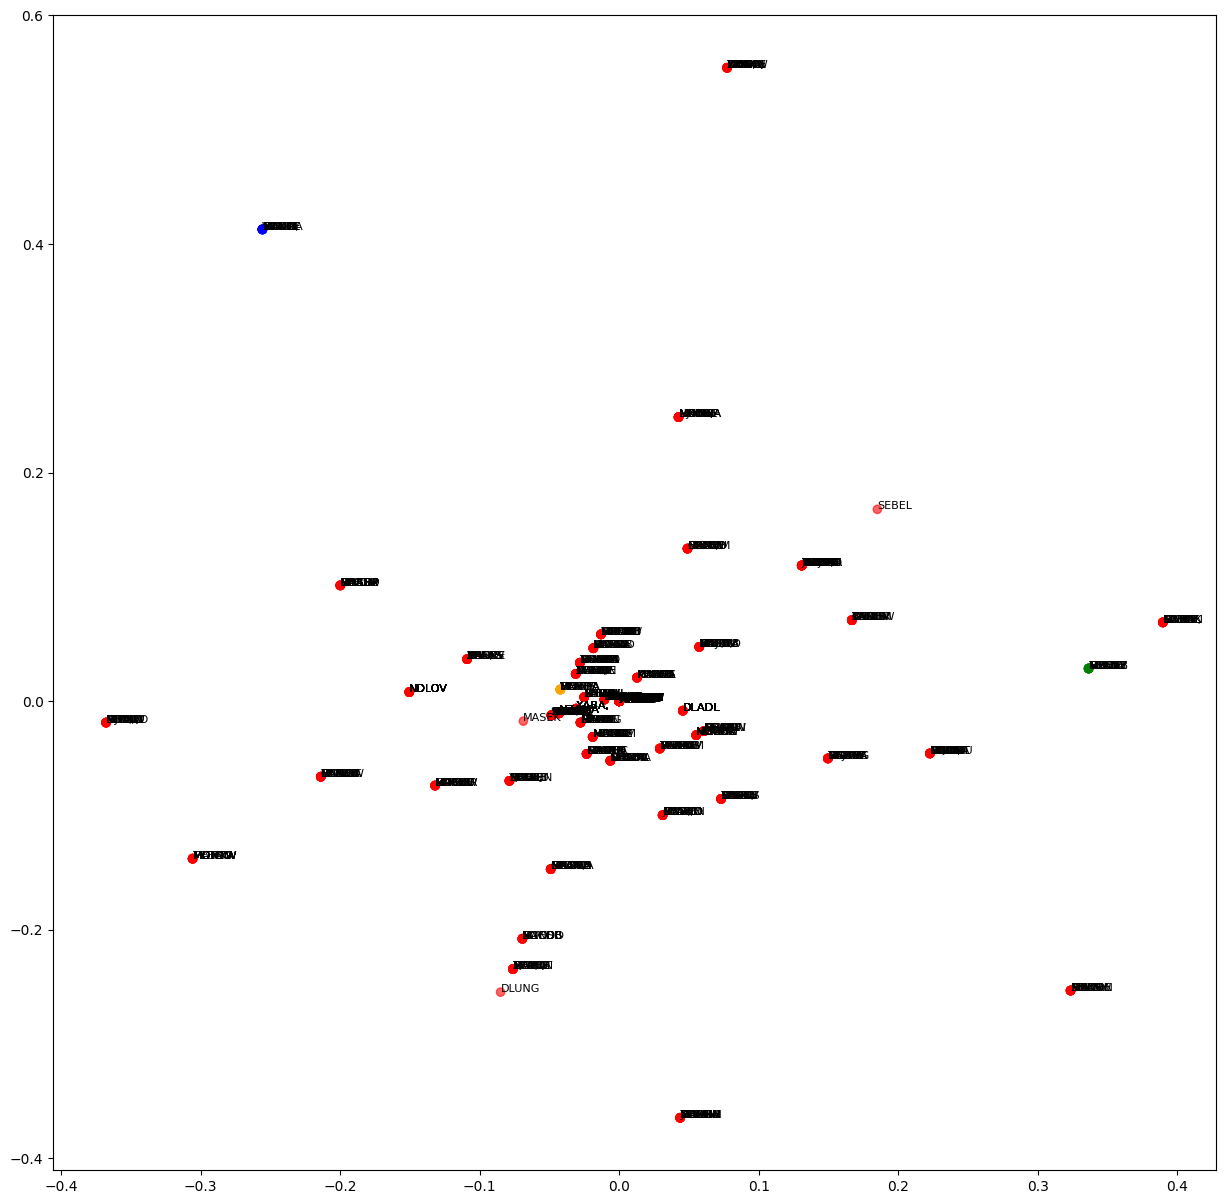

In [ ]:
# Plotting the clusters using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Just 5 clusters for visualization purpose
k=5
model = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=1)
kmean_indices = model.fit_predict(vectors) # both fit and predicts the clusters indices that each docs belongs to # shape (21747,) - think of it like test step, but we are just passing our train data itself
#(21747,)

# Dimensionality reduction
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())  # (21747, 100)
print(scatter_plot_points.shape, type(scatter_plot_points)) # (21747, 2), ndarray

# Plotting
fig, axes = plt.subplots(figsize=(15, 15))
colors = ["red", "green", "blue", "yellow", "orange"]
axes.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=[colors[idx] for idx in kmean_indices], alpha=0.6)

# Annotate with doc names (first 5 chars)
names = load_json(input_file_path)["names"]
for idx, name in enumerate(names):
    name = name[0:5]  # get the names(just first 5 chars) of related each doc
    axes.annotate(text=name, xy=(scatter_plot_points[idx, 0], scatter_plot_points[idx, 1]), fontsize=8)
plt.savefig("topic_clusters.png", dpi=300, bbox_inches="tight")
plt.show()


### LSA: UnSupervised Topic Modeling

- TF-IDF Vector representation
- LSA with Truncated SVD

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/NLP/data/trc_dn.json .
!cp /content/drive/MyDrive/Colab\ Notebooks/NLP/data/months.json .

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
nltk.download("stopwords")

import matplotlib.pyplot as plt
import numpy as np
import string
import json
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

# TF-IDF
def preprocess_text(stop_words, text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    text = text.split()
    clean_text = []
    for w in text:
        if w not in stop_words and not w.isdigit():
            clean_text.append(w)
    clean_text = " ".join(clean_text)
    while "  " in clean_text:
        clean_text = clean_text.replace("  ", " ")
    return clean_text

def clean_data(docs):
    final_docs = []
    stop_words = stopwords.words("english")
    months = load_json("./months.json")
    stop_words = stop_words + months
    for doc in docs:
        cleaned_doc = preprocess_text(stop_words, doc)
        final_docs.append(cleaned_doc)
    return final_docs

# Prepare data
input_file_path = "./trc_dn.json"
docs = load_json(input_file_path)["descriptions"]
cleaned_docs = clean_data(docs)

# Tf-IDF vectorization
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", max_df=10, min_df=3, max_features=100, ngram_range=(1, 3))
# gives original matrix M = (N_docs, n_features)

# LSA
trunc_svd_lsa = TruncatedSVD(n_components=100,  # num of topics
                             algorithm="randomized",
                             n_iter=10)

# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([("tfidf", vectorizer),
                            ("lsa", trunc_svd_lsa)])

# U → Left singular vectors → (N_docs, n_components) → document-topic matrix
# S → Diagonal matrix of singular values → (n_components,) → captures strength of each topic
# Vᵗ → Right singular vectors → (n_components, N_features) → topic-word matrix

svd_matrix = svd_transformer.fit_transform(cleaned_docs)  # U = (N_docs, n_components)
# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

# Get the components (topics) from the SVD
components = trunc_svd_lsa.components_  # Vt - shape: (n_components, n_features) -> (topics, wordvectors)

# Get the TF-IDF feature names
feature_names = vectorizer.get_feature_names_out()

# For each topic, get top-k words
top_k = 10
for topic_idx, topic_weights in enumerate(components):
    top_feature_indices = topic_weights.argsort()[::-1][:top_k]
    top_features = [feature_names[i] for i in top_feature_indices]
    print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

Topic 1: conduct, kutloanong, ratanda heidelberg transvaal, motherwell, supporters suspected proanc, mr ndlovu, xaba, hostage, member ancyl, rent increases
Topic 2: steadville, killed thirty houses, supporters suspected proanc, terms, arson attack alleged, kutloanong, mufc, supporters swanieville near, commander vlakplaas applied, rent increases
Topic 3: supporters supporters, commanders, member disappeared, mr ndlovu, rates boycott, distributing, commander vlakplaas applied, dladla, killed thirty houses, motherwell
Topic 4: mufc, october perpetrator granted, guguletu seven, injuries result, xaba, presence area, tvl july conflict, injured vehicle, funds, chief mangope
Topic 5: dladla, coerced ifp, killed thousand homes, guguletu seven, mr ndlovu, supporters suspected proanc, assaulted killed, kutloanong, xaba, rates boycott
Topic 6: supporters swanieville near, injured vehicle, rates boycott, mr ndlovu, commanders, employer, commander vlakplaas applied, steadville, presence area, claim

In [ ]:
feature_names

array(['abbots poort', 'ac19990030 ac19990197', 'ac19990031 ac19990188',
       'ac19990031 ac19990188 ac19990030', 'african security force',
       'amaqabane', 'arson attack alleged', 'arson attack april',
       'assaulted killed', 'azasm', 'backed', 'bafokeng', 'basotho',
       'bethal', 'bophuthatswana police detention',
       'bophuthatswana security', 'bophuthatswana september', 'carnarvon',
       'chief mangope', 'claims', 'coerced ifp', 'colonel',
       'commander vlakplaas applied', 'commanders', 'committee led',
       'committee led mr', 'conduct', 'cosatu official', 'dam',
       'distributing', 'dladla', 'door', 'eagles', 'eagles club',
       'elizabeth security', 'employer', 'flat', 'funds', 'gangraped',
       'guard shot', 'guguletu seven', 'hostage', 'injured home attacked',
       'injured ifpsupporting residents', 'injured limpet placed',
       'injured vehicle', 'injuries result', 'ivory', 'ivory park',
       'journalist', 'killed sap', 'killed severely',
  

In [ ]:
components.shape

(100, 100)

In [ ]:
svd_matrix.shape

(21747, 100)

components_ is a matrix where each row is a "topic", and each column is a TF-IDF feature (word/ngram).

Higher values in a row mean the feature contributes more to that topic.

Sorting helps you get the top k features that best describe each top

In [ ]:
# Self Practice of LSA
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

def preprocess_text(stop_words, text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    text = text.split()
    clean_text = []
    for w in text:
        if w not in stop_words and not w.isdigit():
            clean_text.append(w)
    clean_text = " ".join(clean_text)
    while "  " in clean_text:
        clean_text = clean_text.replace("  ", " ")
    return clean_text

def clean_data(docs):
    final_docs = []
    stop_words = stopwords.words("english")
    months = load_json("./months.json")
    stop_words = stop_words + months
    for doc in docs:
        cleaned_doc = preprocess_text(stop_words, doc)
        final_docs.append(cleaned_doc)
    return final_docs

# Prepare data
input_file_path = "./trc_dn.json"
docs = load_json(input_file_path)["descriptions"]
cleaned_docs = clean_data(docs)

# tf-idf
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", max_features=100, max_df=10, min_df=5, ngram_range=(1, 3))
# lsa
svd_lsa = TruncatedSVD(n_components=100, n_iter=100, algorithm="randomized")
# pipe
pipe = Pipeline([
    ("tfidf", vectorizer),
    ("lda", svd_lsa)
])

svd_matrix = pipe.fit_transform(cleaned_docs) # n_components, n_features

feature_names = vectorizer.get_feature_names_out()
components = svd_lsa.components_

topk=10
for topic_id, topic_vector in enumerate(components):
    idxs = topic_vector.argsort()[::-1][:topk]
    topics = [feature_names[idx] for idx in idxs]
    print(f"Topic {topic_id + 1}: {', '.join(topics)}")


Topic 1: place political, employer, june operatives sadf, guguletu seven, bafokeng, uprising mr, dladla, mr ndlovu, terms, supreme court
Topic 2: taxi ac19990225, june operatives sadf, guguletu seven, teargassed members sap, local crossroads leader, dladla, azasm, pietersburg transvaal january, chief mangope, survived explosion
Topic 3: ac19980026, june operatives sadf, paterson cape, kutloanong, bafokeng, phola park residents, teargassed members sap, survived explosion, employer, charged sabotage
Topic 4: xaba, guguletu seven, chief mangope, supporters supporters, charged arson, carnarvon, employer, pietersburg transvaal january, survived explosion, security unit
Topic 5: congress kyc khutsong, june severely, pietermaritzburg november intensifying, teargassed members sap, employer, xaba, charges withdrawn, supporters supporters, tension conflict, place ongoing
Topic 6: pinetown natal april, place political, pietermaritzburg november intensifying, pietermaritzburg political conflict, p

### LDA: Unsupervised Topic Modeling
- LDA with Genism
- Lemmatization with spaCy

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

import pyLDAvis
import pyLDAvis.gensim

import json
import re

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Gensim Dictionary and id2word

In [ ]:
# Example of how genism Dictionary works
import gensim
from gensim.corpora import Dictionary

# Your tokenized documents (after preprocessing, bigrams/trigrams etc.)
docs = [
    ["human", "interface", "computer"],
    ["survey", "user", "computer", "system", "response", "time"],
    ["eps", "user", "interface", "system"],
    ["system", "human", "system", "eps"],
    ["user", "response", "time"],
    ["trees"],
    ["graph", "trees"],
    ["graph", "minors", "trees"],
    ["graph", "minors", "survey"]
]

# Create a dictionary from the docs
id2word = Dictionary(docs)
print(id2word.token2id)  # returns token: idx in the alphabetical order

new_doc = ["user", "interface", "user"]
bow = id2word.doc2bow(new_doc)  # doc2bow expects doc as list of tokens - returns bow type token-count per doc
print(bow)  # returns ((tokenid, count)) in the order of alphabetical words

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}
[(2, 1), (7, 2)]


In [ ]:
# Example on what tf-idf helps to find more frequent and rare words
import gensim
from gensim.corpora import Dictionary

docs = [
    ["human", "interface", "computer"],
    ["survey", "user", "computer", "system", "response", "time"],
    ["eps", "user", "interface", "system"],
    ["system", "human", "system", "eps"],
    ["user", "response", "time"],
    ["trees"],
    ["graph", "trees"],
    ["graph", "minors", "trees"],
    ["graph", "minors", "survey"]
]
id2word = Dictionary(docs)
# Let's say your dictionary has
# id2word.token2id = {'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}

# Generate corpus in bow format
corpus = [id2word.doc2bow(doc) for doc in docs]


new_doc = ["user", "interface", "user"]
bow = id2word.doc2bow(new_doc) # Your BoW for this new doc will be [(2, 1), (7, 2)] => [(word_id, frequency), (..)]
print(bow)  # [(2, 1), (7, 2)]

# Now apply TF-IDF to the bow of doc
tfidf = gensim.models.TfidfModel(corpus=corpus, id2word=id2word)
tfidf_scores = tfidf[bow] # you will get a list of tuples of (word_id, tfidf_score) for this doc - [(2, 0.5648663441460566), (7, 0.8251824121072071)]
print(tfidf_scores)

[(2, 1), (7, 2)]
[(2, 0.5648663441460566), (7, 0.8251824121072071)]


Here
- `corpus`: List of documents in **Bag-of-Words (BoW)** format — i.e., each doc is a list of `(word_id, count)` tuples.
- `bow`: One document from that corpus(for loop) in the bow format.
- `tfidf`: A trained `TfidfModel` object.
- `tfidf[bow]`: Gives the **TF-IDF-weighted BoW** representation for that document.

Essentially:

tfidf[bow] = transforms a doc in BoW into TF-IDF weights, giving you:
- Which words are important (high score)
- Which are common and less meaningful (low score)

### Gensim simple_preprocess

In [ ]:
# gensim simple_preprocess - lowercases, tokenize,
# remove the other language accents like ä to a when deacc=True, removes tokens of length < 2 min_len=2, max_length=15
from gensim.utils import simple_preprocess
print(simple_preprocess("i you he she I it whéät you they", deacc=True))
print(simple_preprocess("i you he she I it whéät you they"))

['you', 'he', 'she', 'it', 'wheat', 'you', 'they']
['you', 'he', 'she', 'it', 'whéät', 'you', 'they']


### Gensim's Phrases and Phraser models

Gelps group common word pairs/triples into single tokens i.e to generate bigram, trigrams etc (like "new_york" from "new" and "york").

Think of:
- Phrases as the trainer/model that learns what bigrams/trigrams to detect.
- Phraser(light weight transformer) as the efficient filter that applies that knowledge to new data.
Phraser is a lighter version of Phrases

Phrases learns phrase collocations. It builds statistical phrase model. It is a model that can be trained. Basically used to learn model from text. Phrases learns which word pairs (like "new york") should be combined into "new_york" based on frequency and scoring.

Phraser is Lightweight transformer which applies the phrases model to new texts.This can’t be trained (only used). Use after learning to transform. Phraser Converts the heavy model into a fast transformer. You now use phrasermdl[sentence] to turn e.g. ["new", "york", "city"] → ["new_york", "city"].

In [ ]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.corpora import Dictionary

docs = [
    "human interface computer",
    "survey user computer system response time",
    "user response time minors survey computer",
    "trees computer system response",
    "graph trees minors survey computer",
    "graph minors trees",
    "graph minors survey computer system"
]

# simple preprocess
data = [gensim.utils.simple_preprocess(doc, deacc=True) for doc in docs]

bigram_phrases_mdl = Phrases(data, min_count=2, threshold=1)
trigram_phrases_mdl = Phrases(bigram_phrases_mdl[data], threshold=1)

bigram_phraser = Phraser(bigram_phrases_mdl)
trigram_phraser = Phraser(trigram_phrases_mdl)

print(data)
bigram_phrases_mdl, trigram_phrases_mdl, bigram_phraser, trigram_phraser


[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['user', 'response', 'time', 'minors', 'survey', 'computer'], ['trees', 'computer', 'system', 'response'], ['graph', 'trees', 'minors', 'survey', 'computer'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey', 'computer', 'system']]


(<gensim.models.phrases.Phrases at 0x78c0eeedb450>,
 <gensim.models.phrases.FrozenPhrases at 0x78c0eeedb1d0>)

In [ ]:
# bigrams
data_bigrams = []
for doc in data:
    doc_bigram = bigram_phraser[doc]
    print(doc_bigram)
    data_bigrams.append(doc_bigram)

['human', 'interface', 'computer']
['survey', 'user', 'computer_system', 'response', 'time']
['user', 'response', 'time', 'minors_survey', 'computer']
['trees', 'computer_system', 'response']
['graph', 'trees', 'minors_survey', 'computer']
['graph', 'minors', 'trees']
['graph', 'minors_survey', 'computer_system']


In [ ]:
# trigrams
for doc in data_bigrams:
    print(trigram_phraser[bigram_phraser[doc]])

['human', 'interface', 'computer']
['survey', 'user', 'computer_system', 'response', 'time']
['user', 'response', 'time', 'minors_survey', 'computer']
['trees', 'computer_system', 'response']
['graph', 'trees', 'minors_survey', 'computer']
['graph', 'minors', 'trees']
['graph', 'minors_survey', 'computer_system']


### LDA Model with Gensim and pyLDAvis

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/NLP/data/ushmm_dn.json .

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
import gensim.models as models

import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import json
import re

import pyLDAvis
import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Lets just see how the data looks like
import pandas as pd
data = pd.read_json("./ushmm_dn.json")
data

,RG,texts
0,RG-50.030.0001,My name David Kochalski. I was born in a smal...
1,RG-50.030.0002,All right. My name is Rita Kerner Hilton. I w...
2,RG-50.030.0003,"Yeah. My full name now is Agnes Adachi, and m..."
3,RG-50.030.0004,My name is Esthy Adler. I think I was born i...
4,RG-50.030.0006,Where and when were your born? My father was...
...,...,...
247,RG-50.030.0301,"No. Per Anger, I got other names, which I had..."
248,RG-50.030.0302,"My name is Helene Barac, Helene D. Barac. I w..."
249,RG-50.030.0303,"A loom, that's right. They did that at home. ..."
250,RG-50.030.0306,It was in '38 to '39. I remember being--just ...


In [ ]:
def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

In [ ]:
# Preprocessing
# Stop-word Removal and Lemmatization
def preprocess_data(docs, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    final_docs = []
    stop_words = stopwords.words("english")
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    for doc in docs:
        doc = nlp(doc)
        filtered_tokens = []
        for token in doc:
            if token not in stop_words and token.pos_ in allowed_postags:
                filtered_tokens.append(token.lemma_)
        filtered_doc = " ".join(filtered_tokens)
        final_docs.append(filtered_doc)
    return final_docs



# Loading
docs = load_json("./ushmm_dn.json")["texts"]
# Preprocessing - Lemmatization
lemmatized_docs = preprocess_data(docs)

In [ ]:
# Tokenization of processed docs
def tokenization(docs):
    final_docs = []
    for doc in docs:
        tokens = simple_preprocess(doc, deacc=True) # returns list of tokens with modified language accents when required
        final_docs.append(tokens)
    return final_docs

clean_docs = tokenization(lemmatized_docs)

len(docs), docs[0][:100], len(lemmatized_docs), lemmatized_docs[0][:20], len(clean_docs), clean_docs[0][:20]

(252,
 ' My name David Kochalski. I was born in a small town called , and I was born May 5, 1928.  Well, we ',
 252,
 'name bear small town',
 252,
 ['name',
  'bear',
  'small',
  'town',
  'call',
  'bear',
  'very',
  'hard',
  'work',
  'child',
  'father',
  'mother',
  'small',
  'mill',
  'flour',
  'buckwheat',
  'prosperous',
  'comfortable',
  'go',
  'school'])

In [ ]:
# Generate bigrams and trigrams
bigram_phrases_mdl = gensim.models.Phrases(sentences=clean_docs, min_count=5, threshold=100)
trigram_phrases_mdl = gensim.models.Phrases(sentences=bigram_phrases_mdl[clean_docs], threshold=100)

bigram_phraser = gensim.models.phrases.Phraser(bigram_phrases_mdl)
trigram_phraser = gensim.models.phrases.Phraser(trigram_phrases_mdl)

def generate_bigrams(docs):
    bigram_data = [bigram_phraser[doc] for doc in docs]
    return bigram_data

def generate_trigrams(docs):
    data_bigram_trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in docs]
    return data_bigram_trigrams

In [ ]:
# Generate bigrams and trigrams
bigram_data = generate_bigrams(clean_docs)
data_bigram_trigrams = generate_trigrams(bigram_data) # final data

In [ ]:
type(bigram_data), bigram_data[0]

(list,
 ['name',
  'bear',
  'small',
  'town',
  'call',
  'bear',
  'very',
  'hard',
  'work',
  'child',
  'father',
  'mother',
  'small',
  'mill',
  'flour',
  'buckwheat',
  'prosperous',
  'comfortable',
  'go',
  'school',
  'public',
  'school',
  'morning',
  'afternoon',
  'go',
  'religious',
  'school',
  'almost',
  'late',
  'night',
  'raise',
  'spirit',
  'school',
  'little',
  'city',
  'segregate',
  'mind',
  'small',
  'town',
  'say',
  'majority',
  'people',
  'small',
  'town',
  'jewish',
  'people',
  'town',
  'somehow',
  'know',
  'separate',
  'jewish',
  'child',
  'catholic',
  'child',
  'know',
  'most',
  'people',
  'use',
  'friend',
  'feel',
  'maybe',
  'personally',
  'know',
  'lot',
  'incident',
  'small',
  'little',
  'call',
  'separate',
  'other',
  'word',
  'hardly',
  'get',
  'together',
  'incident',
  'incident',
  'pleasant',
  'incident',
  'call',
  'house',
  'people',
  'regardless',
  'religious',
  'believe',
  'really'

In [ ]:
# Generate id2word and corpus in bow format for our data with unigrams, bigrams and trigrams
id2word = Dictionary(data_bigram_trigrams)

corpus = [id2word.doc2bow(doc) for doc in data_bigram_trigrams]
len(id2word.token2id), len(corpus), corpus[0][0:20]

(15675,
 252,
 [(0, 1),
  (1, 1),
  (2, 10),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 3),
  (9, 1),
  (10, 12),
  (11, 1),
  (12, 8),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 3),
  (17, 2),
  (18, 1),
  (19, 1)])

In [ ]:
list(id2word.token2id.items())[:20]

[('able', 0),
 ('able_bodied', 1),
 ('about', 2),
 ('abroad', 3),
 ('absorb', 4),
 ('accord', 5),
 ('activity', 6),
 ('administrator', 7),
 ('advance', 8),
 ('advantage', 9),
 ('afraid', 10),
 ('afternoon', 11),
 ('again', 12),
 ('age', 13),
 ('ago', 14),
 ('agreement', 15),
 ('ahead', 16),
 ('aim', 17),
 ('air', 18),
 ('airman', 19)]

In [ ]:
# Remove Frequent words from the corpus token based on their tf-idf values.

# Create TF-IDF Model
tfidf_model = gensim.models.TfidfModel(corpus=corpus, id2word=id2word)

# Parameter
low_value_threshold = 0.03
all_removed_words = []

# Process each document
for doc_idx, doc_bow in enumerate(corpus):
    # Get tf-idf scores for the document
    tfidf_scores = tfidf_model[doc_bow]  # doc_bow has [(token_id, count),...] -> [(token_id, tfidfscore),...]

    # Identify low-value and missing words
    low_tfidf_words_ids = [token_id for token_id, tfscore in tfidf_scores if tfscore < low_value_threshold]
    bow_ids = [token_id for token_id, cnt in doc_bow]
    tfidfs = [token_id for token_id, tfscore in tfidf_scores]
    words_missing_in_tfidf_ids = list(set(bow_ids) - set(tfidfs))  # ids not present in tf-idf (zero scores)

    removed_words_ids = low_tfidf_words_ids + words_missing_in_tfidf_ids
    # Collect removed words (optional for analysis)
    for token_id in removed_words_ids:
        all_removed_words.append(id2word[token_id])

    # Filter the bag-of-words representation
    valid_ids = set(bow_ids) - set(removed_words_ids)
    new_doc_bows = [(token_id, cnt) for token_id, cnt in doc_bow if token_id in valid_ids]
    corpus[doc_idx] = new_doc_bows


In [ ]:
len(all_removed_words), all_removed_words[:100]

(161160,
 ['able',
  'able_bodied',
  'about',
  'abroad',
  'accord',
  'activity',
  'advantage',
  'afternoon',
  'again',
  'age',
  'ago',
  'agreement',
  'air',
  'alive',
  'all',
  'allow',
  'almost',
  'already',
  'also',
  'always',
  'ammunition',
  'angle',
  'angry',
  'announce',
  'answer',
  'anymore',
  'apartment',
  'apprentice',
  'approach',
  'approximately',
  'armament',
  'army',
  'around',
  'arrange',
  'as',
  'as_soon',
  'ashamed',
  'ask',
  'at',
  'attack',
  'attend',
  'aunt',
  'austrian',
  'avoid',
  'away',
  'back',
  'bad',
  'bag',
  'bang',
  'barber',
  'bathroom',
  'bear',
  'beautiful',
  'become',
  'bed',
  'before',
  'begin',
  'beginning',
  'behave',
  'behind',
  'believe',
  'big',
  'bird',
  'bit',
  'black',
  'bleed',
  'blood',
  'body',
  'book',
  'boot',
  'bother',
  'boyfriend',
  'bridge',
  'bring',
  'brother',
  'building',
  'bullet',
  'burn',
  'bury',
  'business',
  'busy',
  'butcher',
  'buy',
  'by',
  'ca

In [ ]:
# LDA model Training
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1], num_topics=20, id2word=id2word,
                                            chunksize=100, passes=10, update_every=1, alpha="auto", random_state=100)

In [ ]:
# visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus[:-1], dictionary=id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.264057 -0.043668       1        1  13.373770
3     -0.362639 -0.041534       2        1  10.420396
7     -0.101551 -0.202904       3        1   9.499032
17    -0.110784 -0.392165       4        1   8.255901
2      0.006248  0.406945       5        1   7.169752
16    -0.268233  0.191412       6        1   6.771014
5     -0.404177  0.130589       7        1   6.049673
18    -0.323894 -0.233972       8        1   5.967568
15     0.009147 -0.325701       9        1   5.039408
13     0.321961 -0.281713      10        1   4.518365
19     0.126658 -0.281977      11        1   4.271954
14     0.295700  0.228521      12        1   4.067623
6     -0.035104 -0.006110      13        1   3.179684
1      0.192683  0.356215      14        1   3.176645
10    -0.162440  0.332391      15        1   3.169062
12     0.031056  0.182749      16        1   1.816238
9      0.269661 -0.109265      17        1   1.365964
0      0.350117 -0.009243      18        1   0.916563
4      0.262304  0.079284      19        1   0.817927
8      0.167344  0.020145      20        1   0.153461, topic_info=           Term         Freq        Total Category  logprob  loglift
848         use  1532.000000  1532.000000  Default  30.0000  30.0000
660    remember   931.000000   931.000000  Default  29.0000  29.0000
1355     ghetto  2498.000000  2498.000000  Default  28.0000  28.0000
26         also   849.000000   849.000000  Default  27.0000  27.0000
112     brother  1041.000000  1041.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3181         ph     0.899593   107.063034  Topic20  -5.7953   1.7003
1652    patient     0.753325    40.075378  Topic20  -5.9728   2.5055
3541       rate     0.725194    27.989609  Topic20  -6.0108   2.8263
1426  infection     0.681610    26.935085  Topic20  -6.0728   2.8028
1067   carriage     0.709767    64.773085  Topic20  -6.0324   1.9658

[1368 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4269     20  0.475987  ability
0         1  0.133749     able
0         2  0.246380     able
0         3  0.152521     able
0         4  0.011732     able
...     ...       ...      ...
2549      4  0.024494  zionist
2549      5  0.416396  zionist
2549      9  0.048988  zionist
2549     10  0.367408  zionist
2549     18  0.134716  zionist

[3312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 8, 18, 3, 17, 6, 19, 16, 14, 20, 15, 7, 2, 11, 13, 10, 1, 5, 9])

In [ ]:
# LDA model Test
test_doc_bow = corpus[-1]
doc_lda_vector = lda_model[test_doc_bow] # returns [(topic_id, itsmembership)..] of that doc to all topics

In [ ]:
type(test_doc_bow), len(test_doc_bow), test_doc_bow[:10]

(list,
 99,
 [(44, 22),
  (122, 16),
  (138, 6),
  (278, 4),
  (302, 10),
  (349, 8),
  (402, 4),
  (448, 18),
  (474, 4),
  (606, 17)])

In [ ]:
type(doc_lda_vector), len(doc_lda_vector), doc_lda_vector

(list,
 12,
 [(2, 0.11520473),
  (3, 0.07225586),
  (6, 0.027527811),
  (7, 0.20239171),
  (8, 0.014010954),
  (9, 0.018181471),
  (11, 0.07913598),
  (13, 0.1808019),
  (14, 0.027639277),
  (15, 0.073688425),
  (17, 0.15831152),
  (19, 0.014874841)])

In [ ]:
sorted_by_topic_membership = sorted(doc_lda_vector, key=lambda x: x[1], reverse=True)
sorted_by_topic_membership

[(7, 0.20239171),
 (13, 0.1808019),
 (17, 0.15831152),
 (2, 0.11520473),
 (11, 0.07913598),
 (15, 0.073688425),
 (3, 0.07225586),
 (14, 0.027639277),
 (6, 0.027527811),
 (9, 0.018181471),
 (19, 0.014874841),
 (8, 0.014010954)]

We can also retrieve the document topic distribution and topic word distribution from a trained LDA model

In [ ]:
# Get the doc topic distribution and topic word distribution for a specific word

test_doc_bow = corpus[-1]

# Get the topic distribution for the document
doc_topic_distribution = lda_model.get_document_topics(test_doc_bow)
topic_word_dsitribution = lda_model.get_topic_terms(topicid=0, topn=10)

print(doc_topic_distribution)
print(topic_word_dsitribution)

for word_id, prob in topic_word_dsitribution:
    print(f"{lda_model.id2word[word_id], prob} \n")

[(2, 0.11520381), (3, 0.07225964), (6, 0.027527805), (7, 0.20238873), (8, 0.014010949), (9, 0.01818127), (11, 0.07913623), (13, 0.18080162), (14, 0.027637044), (15, 0.073688954), (17, 0.158316), (19, 0.014874788)]
[(357, 0.049734887), (543, 0.04466132), (1555, 0.04279281), (3377, 0.027353413), (350, 0.022591932), (927, 0.018643437), (398, 0.015629355), (780, 0.014432284), (970, 0.01270975), (829, 0.0119013805)]
('guy', 0.049734887) 

('number', 0.04466132) 

('military', 0.04279281) 

('dp', 0.027353413) 

('great', 0.022591932) 

('american', 0.018643437) 

('hospital', 0.015629355) 

('supply', 0.014432284) 

('baby', 0.01270975) 

('truck', 0.0119013805) 



In [ ]:
# show topics with specified number of words
for index, topic in lda_model.show_topics(formatted=False, num_words=40):
    print(topic)

[('additional', 0.010462244), ('emotional', 0.0070653325), ('terminate', 0.006097333), ('uh', 0.0058715413), ('inform', 0.0057662944), ('doctor', 0.0049913977), ('abortion', 0.004826982), ('mood', 0.0042559137), ('malformation', 0.00425591), ('publish', 0.0040320414), ('ability', 0.0039949836), ('public', 0.0038388036), ('officer', 0.0037985616), ('sulfa', 0.0037545224), ('attend', 0.003728589), ('change', 0.003654459), ('result', 0.0036033865), ('relation', 0.003352697), ('drug', 0.0032825866), ('hygiene', 0.003187032), ('gross', 0.003150516), ('disease', 0.003043845), ('ph', 0.0030416786), ('thesis', 0.0029323057), ('patient', 0.0025471204), ('rate', 0.0024520068), ('confirm', 0.0024038695), ('carriage', 0.002399844), ('obligation', 0.0023360658), ('infection', 0.0023046413), ('basically', 0.0023012806), ('revive', 0.0022712958), ('after_all', 0.002179394), ('brewery', 0.0018536943), ('ovary', 0.0018536905), ('obstetrical', 0.00185369), ('mongoloid', 0.00185369), ('tetanus', 0.001853

In [ ]:
# We can print the topics and their  words distribution
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.050*"guy" + 0.045*"number" + 0.043*"military" + 0.027*"dp" + '
  '0.023*"great" + 0.019*"american" + 0.016*"hospital" + 0.014*"supply" + '
  '0.013*"baby" + 0.012*"truck"'),
 (1,
  '0.073*"on" + 0.070*"course" + 0.047*"indecipherable" + 0.045*"husband" + '
  '0.028*"able" + 0.023*"situation" + 0.022*"swedish" + 0.013*"office" + '
  '0.013*"person" + 0.013*"action"'),
 (2,
  '0.019*"case" + 0.018*"trial" + 0.017*"record" + 0.013*"witness" + '
  '0.012*"certain" + 0.011*"crime" + 0.011*"kind" + 0.010*"court" + '
  '0.010*"property" + 0.010*"order"'),
 (3,
  '0.066*"ghetto" + 0.013*"girl" + 0.012*"barrack" + 0.011*"survive" + '
  '0.008*"area" + 0.008*"course" + 0.008*"line" + 0.008*"camp" + '
  '0.008*"clothing" + 0.007*"sudden"'),
 (4,
  '0.112*"hide" + 0.019*"resistance" + 0.017*"thought" + 0.014*"physician" + '
  '0.013*"travel" + 0.012*"ghetto" + 0.012*"window" + 0.012*"boxcar" + '
  '0.010*"finally" + 0.009*"possible"'),
 (5,
  '0.131*"use" + 0.062*"kill" + 0.028*"run" + 0

### Evaluation of trained LDA model using Coherence and Perplexity

**Perplexity**

In LDA , perplexity serves as a measure of how well the model predicts unseen data, essentially indicating the model's ability to generalize.

`Lower perplexity score =  The better the model at predicting the content of new documents`

Perplexity is calculated by evaluating the probability of a held-out set of documents given the trained LDA model. In essence, perplexity provides insights into how well an LDA model can "understand" and represent the relationships between words and topics within a corpus of documents

**Coherence**

In LDA, topic coherence tells us about the interpretability and semantic similarity of words within a topic. It measures how well the words associated with a topic align semantically, indicating how well a topic reflects a cohesive concept.

`Higher coherence score = Better topic quality and more interpretable topics.`


In [ ]:
test_doc_bow

[(44, 22),
 (122, 16),
 (138, 6),
 (278, 4),
 (302, 10),
 (349, 8),
 (402, 4),
 (448, 18),
 (474, 4),
 (606, 17),
 (623, 2),
 (646, 38),
 (650, 10),
 (909, 4),
 (983, 8),
 (985, 8),
 (1010, 6),
 (1069, 3),
 (1117, 3),
 (1147, 3),
 (1169, 4),
 (1275, 3),
 (1386, 3),
 (1415, 4),
 (1662, 7),
 (1713, 6),
 (1793, 3),
 (1797, 5),
 (1882, 4),
 (1945, 7),
 (2395, 3),
 (2424, 9),
 (2472, 5),
 (2541, 12),
 (2563, 4),
 (2627, 8),
 (2724, 4),
 (2881, 2),
 (2917, 2),
 (2941, 5),
 (3008, 3),
 (3043, 3),
 (3094, 3),
 (3161, 4),
 (3188, 8),
 (3284, 4),
 (3311, 2),
 (3584, 3),
 (3721, 4),
 (4049, 3),
 (4271, 2),
 (4481, 8),
 (5347, 2),
 (5793, 2),
 (5979, 2),
 (6533, 2),
 (6590, 3),
 (6902, 2),
 (7265, 2),
 (7347, 3),
 (8222, 2),
 (8409, 3),
 (8935, 2),
 (8973, 5),
 (9345, 2),
 (9642, 2),
 (9694, 5),
 (10174, 2),
 (11135, 3),
 (12084, 6),
 (14682, 10),
 (14698, 10),
 (14701, 8),
 (14702, 2),
 (14720, 2),
 (14722, 10),
 (14725, 10),
 (14750, 10),
 (14803, 10),
 (15655, 1),
 (15656, 2),
 (15657, 1),
 (15

In [ ]:
# Computing Perplexity to evaluate LDA model
print(f"Perplexity: {lda_model.log_perplexity([test_doc_bow])}")  # Returns per-word likelihood bound, using a chunk of documents as evaluation corpus.

# Computing topic Coherence score of trained LDA model
coherencemodel = gensim.models.CoherenceModel(model=lda_model, texts=data_bigram_trigrams, dictionary=id2word, coherence="c_v")
print(f"Coherence: {coherencemodel.get_coherence()}")

Perplexity: -154.82494004043107
Coherence: 0.3255464360832929


In [ ]:
# Saving and loading the gensim models
lda_model.save("mytopiclda_mdl.model")
loaded_lda_model = gensim.models.ldamodel.LdaModel.load("mytopiclda_mdl.model")

In [ ]:
# test the new loaded model
test_doc_bow = corpus[-1]
doc_lda_vector = loaded_lda_model[test_doc_bow]
sorted_by_topic_membership = sorted(doc_lda_vector, key=lambda x: x[1], reverse=True)
sorted_by_topic_membership

[(7, 0.20238608),
 (13, 0.18080129),
 (17, 0.15832016),
 (2, 0.11520303),
 (11, 0.07913641),
 (15, 0.07368952),
 (3, 0.07226072),
 (14, 0.027636897),
 (6, 0.027527723),
 (9, 0.018181095),
 (19, 0.014874723),
 (8, 0.014010943)]

### Note on Latent:

In Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA), the term "latent" refers to the **hidden or underlying topics that are not directly observed but are inferred from the relationships between words and documents**. These hidden topics, also called "themes," are discovered through analyzing the co-occurrence of words within a corpus of text.

Topic modeling assumes that documents are composed of combinations of different topics, and these topics are not explicitly stated in the documents themselves. These underlying topics are the "latent variables".

LSA and LDA use different techniques to infer these latent topics. LSA employs Singular Value Decomposition (SVD) to decompose a term-document matrix, while LDA uses a probabilistic model to estimate the probability of words belonging to certain topics and topics belonging to specific documents.

### LDA2Vec

LDA2vec, a model that learns **dense word vectors** jointly with **Dirichlet-distributed latent document-level mixtures of topic vectors**. It builds document representations on top of word embeddings


**LDA2Vec** is a model that **combines**:
- **LDA** (Latent Dirichlet Allocation) → for **topics**
- **Word2Vec** → for **word embeddings**

---
  
> **LDA2Vec = LDA (topics) + Word2Vec (semantics)**  
> → Gives smooth, semantic, meaningful topics and embeddings

**Goal:**  
Instead of using only **word counts** (like in LDA - bow), it uses **word vectors** (dense, semantic, learned representations).  
This way:
- You get topics (like LDA)
- But the topics are **more semantic**, **contextual**, and **smooth**

| LDA | Word2Vec | LDA2Vec |
|:---|:---|:---|
| Works on counts (BoW) | Works on predicting neighboring words | Learns topics + word embeddings together |
| Produces "topics" but words are sometimes unrelated | No topics, only embeddings | Topics are smooth clusters in embedding space |
| Discrete and sparse | Dense and continuous | Dense + Topic aware |

---

# How LDA2Vec architecture works

Inspired by Latent Dirichlet Allocation (LDA), the word2vec model is expanded to simultaneously learn word, document and topic vectors. Lda2vec is obtained by modifying the skip-gram word2vec variant. In the original skip-gram method, the model is trained to predict context words based on a target word. In lda2vec, the target word vector and a document vector are added to obtain a context vector. This context vector is then used to predict context words.

With lda2vec, instead of using the word vector directly to predict context words, we leverage a context vector to make the predictions. This **context vector** is created as the **sum** of two other vectors: the **word vector and the document vector**.

The word vector is generated by the same skip-gram word2vec model discussed earlier. The document vector is more interesting. It is really a weighted combination of two other components:

- the document weight vector, representing the “weights” (later to be transformed into percentages) of each topic in the document
- the topic matrix, representing each topic and its corresponding vector embedding

Together, the document vector and the word vector generate “context” vectors for each word in the document.

The power of lda2vec lies in the fact that it not only learns word embeddings (and context vector embeddings) for words(word similarities), it simultaneously learns topic representations and document representations as well.

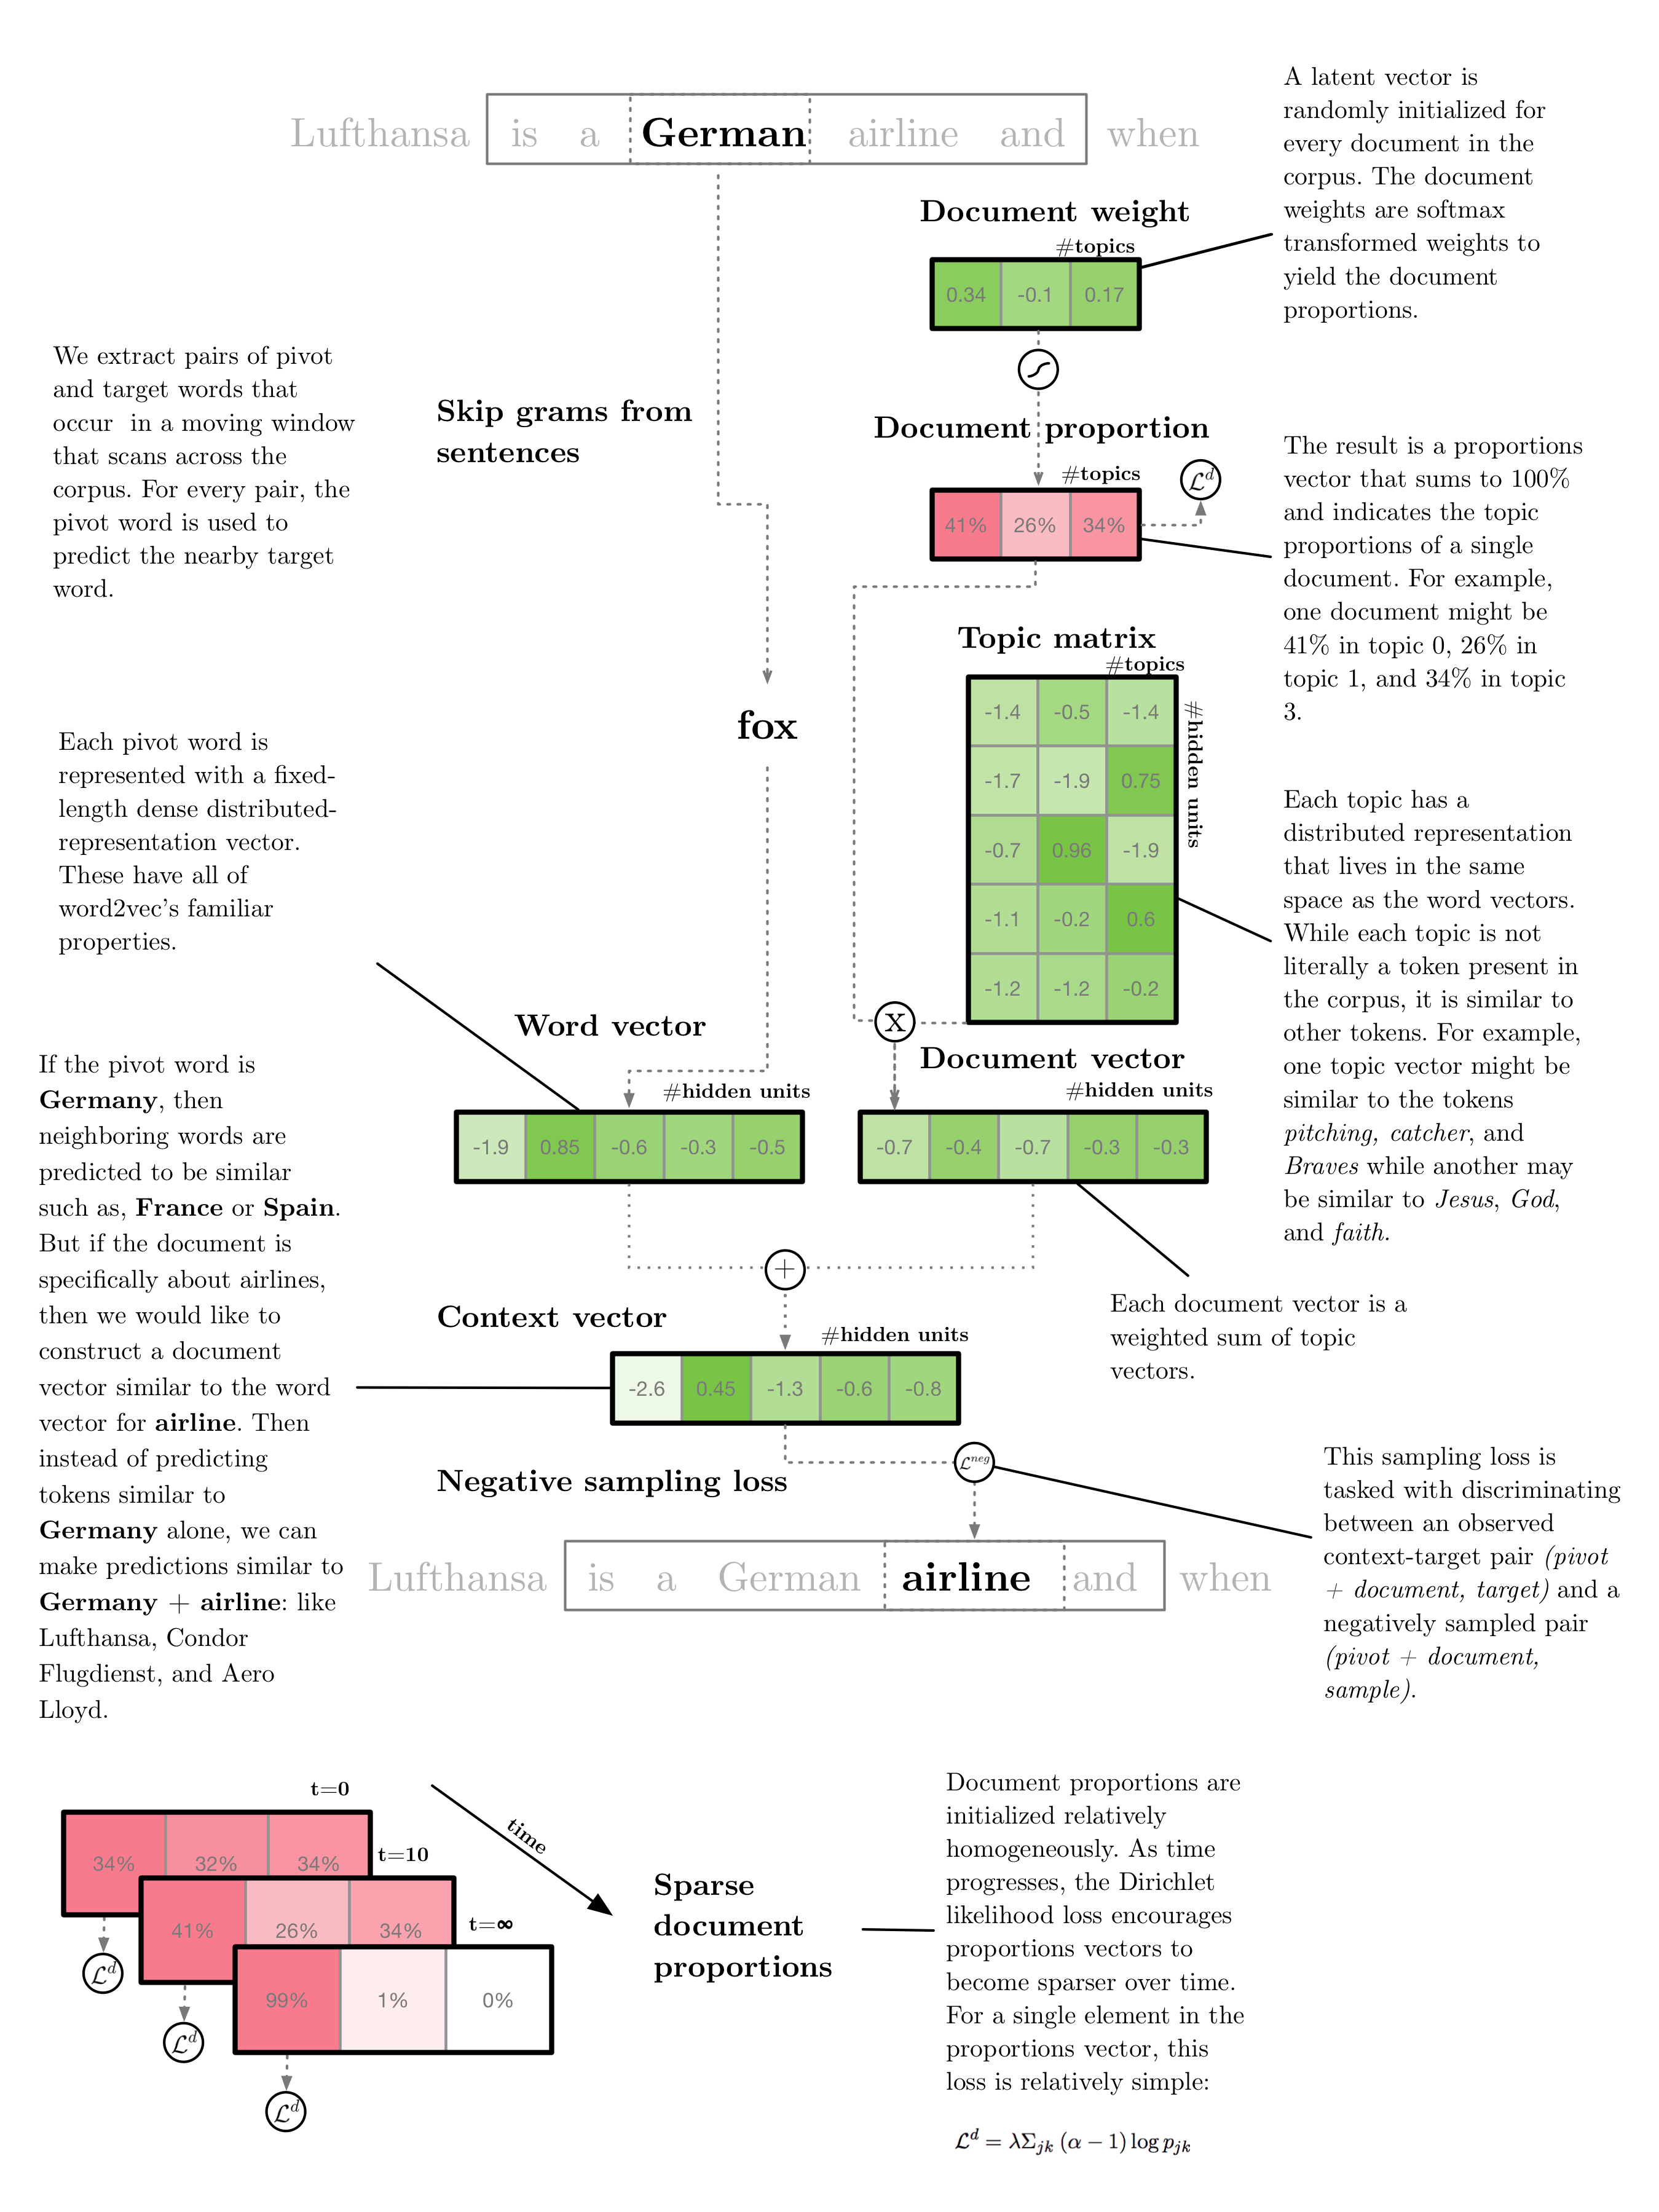

https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=

---

### LDA2Vec Loss Function
It mixes two ideas:
- **Skip-Gram Negative Sampling** (from Word2Vec): predict context words.
- **Dirichlet Prior** (from LDA): enforce that each document is a mixture of topics.

Total Loss = **Word2Vec loss** + **Dirichlet regularization**

---

# Practical Outcomes
- **Topics** are now "clouds" of word vectors close together.
- You can compute **topic-word similarity**, **document-topic similarity**, **word-word similarity** all in the same model.
- **Documents** and **topics** live in the **same vector space**.

---

# Intuition

Imagine you're trying to **guess what movie** you're watching:

- Words in the subtitles give you clues.
- LDA2Vec doesn't just count the words — it knows that "blast", "explosion", "battle" are **semantically close**.
- It groups documents into **topics** using **semantic meanings**, not just raw counts.

In [ ]:
# !pip install lda2vec